In [1]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 92.7MB/s 
     |████████████████████████████████| 2.9MB 61.4MB/s 
     |████████████████████████████████| 92kB 5.7MB/s 
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [2]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)


!ls "/gdrive/My Drive"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
 물류
'0216제갈용승 - 제가리.html'
 0216제갈용승.html
'0223 퀴즈 제갈용승(5018) - 제가리.html'
'0223 퀴즈 제갈용승(5018).html'
'0320_과제_제갈용승 - 제가리.html'
 0320_과제_제갈용승.html
'0327 퀴즈 제갈용승(5018) - 제가리.html'
'0327 퀴즈 제갈용승(5018).html'
'0327_test_제갈용승 - 제가리.html'
 0327_test_제갈용승.html
 03.adjacent_gu.pickle
 04.y_geometry.csv
 05.용승_마트.csv
 05.용승_병원.csv
 05.용승_공원.csv
 05.용승_백

In [1]:
def read_data(filename):
    with open(filename, 'r', encoding = 'cp949') as f:
        data = [line.split('\t') for line in f.read().splitlines()]
        # txt 파일의 헤더(id document label)는 제외하기
        data = data[1:]
    return data

In [2]:
train_data = read_data('ratings_train.txt')
test_data = read_data('ratings_test.txt')

In [3]:
print(len(train_data))
print(len(train_data[0]))
print(len(test_data))
print(len(test_data[0]))

150000
3
50000
3


In [5]:
train_data

[['9976970', '아 더빙.. 진짜 짜증나네요 목소리', '0'],
 ['3819312', '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나', '1'],
 ['10265843', '너무재밓었다그래서보는것을추천한다', '0'],
 ['9045019', '교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정', '0'],
 ['6483659',
  '사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다',
  '1'],
 ['5403919', '막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.', '0'],
 ['7797314', '원작의 긴장감을 제대로 살려내지못했다.', '0'],
 ['9443947',
  '별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네',
  '0'],
 ['7156791', '액션이 없는데도 재미 있는 몇안되는 영화', '1'],
 ['5912145', '왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?', '1'],
 ['9008700', '걍인피니트가짱이다.진짜짱이다♥', '1'],
 ['10217543', '볼때마다 눈물나서 죽겠다90년대의 향수자극!!허진호는 감성절제멜로의 달인이다~', '1'],
 ['5957425', '울면서 손들고 횡단보도 건널때 뛰쳐나올뻔 이범수 연기 드럽게못해', '0'],
 ['8628627', '담백하고 깔끔해서 좋다. 신문기사로만 보다 보면 자꾸 잊어버린다. 그들도 사람이었다는 것을.', '1'],
 ['9864035', '취향은 존중한다지만 진짜 내생에 극장에서 본 영화중 가장 노잼 노감동임 스토리도 어거지고 감동도 어거지', '0'],
 ['6852435', 'ㄱ냥 매번 긴장되고 재밋음ㅠㅠ', '1'],
 ['9143163',
  '참 사람들 웃긴게 

In [4]:
from konlpy.tag import Okt

In [5]:
okt = Okt()
print(okt.pos(u'이 밤 그날의 반딧불을 당신의 창 가까이 보낼게요'))

[('이', 'Noun'), ('밤', 'Noun'), ('그날', 'Noun'), ('의', 'Josa'), ('반딧불', 'Noun'), ('을', 'Josa'), ('당신', 'Noun'), ('의', 'Josa'), ('창', 'Noun'), ('가까이', 'Noun'), ('보낼게요', 'Verb')]


In [6]:
import json
import os
from pprint import pprint

In [7]:
def tokenize(doc):
    # norm은 정규화, stem은 근어로 표시하기를 나타냄
    return ['/'.join(t) for t in okt.pos(doc, norm=True, stem=True)]

In [ ]:
for row in train_data:
    t = tokenize(row[1])
    print(t)

['아/Exclamation', '더빙/Noun', '../Punctuation', '진짜/Noun', '짜증나다/Adjective', '목소리/Noun']
['흠/Noun', '.../Punctuation', '포스터/Noun', '보고/Noun', '초딩/Noun', '영화/Noun', '줄/Noun', '..../Punctuation', '오버/Noun', '연기/Noun', '조차/Josa', '가볍다/Adjective', '않다/Verb']
['너/Modifier', '무재/Noun', '밓었/Noun', '다그/Noun', '래서/Noun', '보다/Verb', '추천/Noun', '한/Josa', '다/Adverb']
['교도소/Noun', '이야기/Noun', '구먼/Noun', '../Punctuation', '솔직하다/Adjective', '재미/Noun', '는/Josa', '없다/Adjective', '../Punctuation', '평점/Noun', '조정/Noun']
['사이/Modifier', '몬페/Noun', '그/Determiner', '의/Noun', '익살스럽다/Adjective', '연기/Noun', '가/Josa', '돋보이다/Verb', '영화/Noun', '!/Punctuation', '스파이더맨/Noun', '에서/Josa', '늙다/Verb', '보이다/Verb', '하다/Verb', '커스틴/Noun', '던스트/Noun', '가/Josa', '너무나도/Adverb', '이쁘다/Adjective', '보이다/Verb']
['막/Noun', '걸음/Noun', '마/Noun', '떼다/Verb', '3/Number', '세/Noun', '부터/Josa', '초등학교/Noun', '1/Number', '학년/Noun', '생인/Noun', '8/Number', '살다/Verb', '영화/Noun', './Punctuation', 'ㅋㅋㅋ/KoreanParticle', '.../Punctuation', '별/Modif

['불알/Noun', '이/Josa', '나오다/Verb', '당황/Noun', '.../Punctuation', '아무튼/Adverb', '영화/Noun', '가/Josa', '중간/Noun', '에/Josa', '끝나다/Verb', '느낌/Noun']
['평범하다/Adjective', '속/Noun', '에/Josa', '녹다/Verb', '평범하다/Adjective', '일상/Noun', './Punctuation', '조금/Noun', '밋밋하다/Adjective', '흠/Noun', './Punctuation']
['보다/Verb', '계속/Noun', '보다/Verb', '전개도/Noun', '느리다/Adjective', '주인공/Noun', '인/Josa', '은희/Noun', '는/Josa', '한두/Modifier', '컷/Noun', '나오다/Verb', '소/Modifier', '극적/Noun', '인/Josa', '모습/Noun', '에/Josa', '짜증/Noun', '이/Josa', 'ㅜㅜ/KoreanParticle', '맨날/Adverb', '언제/Noun', '끝나다/Verb', '기/Modifier', '대만/Noun', '하고/Josa', '있다/Adjective', '전개/Noun', '좀/Noun', '빨리/Adverb', '빨리/Adverb', 'ㅜㅜ/KoreanParticle']
['사랑/Noun', '하고/Josa', '싶다/Verb', ',/Punctuation', '가슴속/Noun', '온/Modifier', '감정/Noun', '을/Josa', '헤집다/Verb', '영화/Noun', '예요/Josa', '정말/Noun', '최고/Noun', './Punctuation']
['많다/Adjective', '사람/Noun', '들/Suffix', '이/Josa', '이/Noun', '다큐/Noun', '를/Josa', '보고/Noun', '우리나라/Noun', '슬프다/Adjective', '현대/Noun', '사의/

['이/Noun', '영화/Noun', '를/Josa', '이제/Noun', '서다/Verb', '보다/Verb', '../Punctuation', '감히/Noun', '내/Noun', '인생/Noun', '최고/Noun', '의/Josa', '영화/Noun', '중/Suffix', '하나로/Noun', '꼽/Noun', '을/Josa', '수/Noun', '있다/Adjective', '작품/Noun', './Punctuation', '어떻다/Adjective', '살/Noun', '아/Josa', '야하다/Adjective', '나르다/Verb', '위/Noun', '한/Josa', '고민/Noun', '을/Josa', '한번/Noun', '더/Noun', '하다/Verb', '되다/Verb', '시간/Noun', './Punctuation', '그리고/Conjunction', '모건/Noun', '프리/Noun', '멀다/Adjective', '나이/Noun', '가/Josa', '들다/Verb', '여전하다/Adjective', '섹시하다/Adjective', './Punctuation']
['작가/Noun', '가/Josa', '별로/Noun', '다/Josa', '내/Determiner', '용이/Noun', '진짜/Noun', '별로/Noun', '임/Noun', '../Punctuation', '맨날/Adverb', '그냥/Modifier', '기대/Noun', '하고/Josa', '재방송/Noun', '하다/Verb', '혹/Noun', '시나/Noun', '하고/Josa', '보다/Verb', '답/Noun', '없다/Adjective', '진짜/Noun', '../Punctuation']
['명작/Noun', '도/Josa', '이렇다/Adjective', '명작/Noun', '이/Josa', '있다/Adjective', '싶다/Verb', './Punctuation', '보고/Noun', '또/Noun', '보다/Verb', '여운/Noun

['윤종신/Noun', '복귀/Noun', '는/Josa', '좋다/Adjective', '이하늘/Noun', '은/Josa', '도대체/Noun', '왜/Noun', '뽑히다/Verb', '알다/Verb', '없다/Adjective', './Punctuation', '참가자/Noun', '실력/Noun', '을/Josa', '따다/Verb', '전/Noun', '에/Josa', '심사/Noun', '위원/Noun', '인격/Noun', '과/Josa', '실력/Noun', '부터/Josa', '쌓다/Verb', '오다/Verb', '^^/Punctuation', '어/Noun', '하/Suffix', '어허/Exclamation', '그만/Modifier', '좀/Noun', '하다/Verb']
['광장/Noun', '한/Josa', '작품/Noun', '옛날/Noun', '것/Noun', '도/Josa', '보고/Noun', '싶다/Verb']
['내/Noun', '생/Noun', '의/Josa', '최고/Noun', '의/Josa', '영화/Noun']
['어린시절/Noun', '너무/Adverb', '무섭다/Adjective', '재미있다/Adjective', '보다/Verb', '추억/Noun', '의/Josa', '판타지영화/Noun', './Punctuation', '절대/Noun', '나쁘다/Adjective', '짓다/Verb', '금물/Noun', './Punctuation', '지옥/Noun', '가요/Noun', '../Punctuation']
['기존/Noun', '멜로영화/Noun', '형식/Noun', '을/Josa', '탈피/Noun', '하다/Verb', '하다/Verb', '감정/Noun', '의/Josa', '절제/Noun', '가/Josa', '지나치다/Verb', '너무/Adverb', '담백하다/Adjective', '영화/Noun']
['난/Noun', '사랑비/Noun', '서준/Noun', '에게/Josa', '쏙/

['모녀/Noun', '를/Josa', '토막/Noun', '살해/Noun', '한/Josa', '살인자/Noun', '가/Josa', '부/Noun', '성/Modifier', '애/Noun', '라니/Josa', '..../Punctuation', '말/Noun', '이/Josa', '되다/Verb', '.../Punctuation', '감동/Noun', '받다/Verb', '사람/Noun', '들/Suffix', '본인/Noun', '들/Suffix', '이/Josa', '피해자/Noun', '가/Josa', '되다/Verb', '감동/Noun', '받다/Verb', '하다/Verb', '.../Punctuation', '진심/Noun', '묻다/Verb', '.../Punctuation']
['재밌다/Adjective', '평점/Noun', '이/Josa', '왜/Noun', '이렇게/Adverb', '구리지/Noun']
['아/Exclamation', 'OOO/Alpha', '기/Noun', '../Punctuation', '이/Determiner', '걸/Noun', '보다/Verb', '내/Determiner', '눈/Noun', '이/Josa', '아깝다/Adjective', 'ㅡㅡ/KoreanParticle', '진짜/Noun', '아/Exclamation', '놓다/Verb', '진짜/Noun', 'OOO/Alpha', '기/Modifier', '명작/Noun', '이네/Josa', '요/Noun']
['필름/Noun', '값/Noun', '이/Josa', '아깝다/Adjective', '../Punctuation', '재미/Noun', '더럽다/Adjective', '없다/Adjective', '../Punctuation', '2/Number', '점/Noun', '부터/Josa', '점/Noun', '수준/Noun', '것/Noun', '들/Suffix', '매미/Noun', 'OO/Alpha']
['또/Noun', '보고/Noun', '

['배우/Noun', '들/Suffix', '의/Josa', '연기/Noun', '는/Josa', '좋다/Adjective', '../Punctuation', '뭘/Noun', '말/Noun', '하다/Verb', '건지다/Verb', '?/Punctuation']
['학위/Noun', '위조/Noun', '성범죄자/Noun', '문/Modifier', '제자/Noun', '들/Suffix', '만/Josa', '모으다/Verb', '영화/Noun', '찍다/Verb', '왜/Noun', '그렇다/Adjective', '제작비/Noun', '아끼다/Verb', '구/Noun', '패자부활전/Noun', '하다/Verb', '?/Punctuation']
['솔직하다/Adjective']
['완전/Noun', '재미있다/Adjective', './Punctuation', '애/Noun', '들/Suffix', '도/Josa', '보기/Noun', '에/Josa', '알맞다/Adjective']
['잔인하다/Adjective', '하다/Verb', '무섭다/Adjective', 'ㅠ/KoreanParticle', '탑/Noun', '은/Josa', '멋있다/Adjective', '~~/Punctuation']
['무섭다/Adjective', '않다/Verb', '기분/Noun', '만/Josa', '나쁘다/Adjective', '쩝/Adverb']
['군더더기/Noun', '없다/Adjective', '깔끔하다/Adjective', '그러나/Conjunction', '강하다/Adjective', '메세지/Noun', '전달/Noun', './Punctuation', '뜻밖/Noun', '의/Josa', '차다/Verb', '좋다/Adjective', '영화/Noun', '..!/Punctuation']
['이/Noun', '영화/Noun', '는/Josa', '최고다/Noun', './Punctuation', '그냥/Noun', '최고/Noun', '야/Josa',

['CG/Alpha', '도/Noun', '별로/Noun', '고/Josa', '전개도/Noun', '별로/Noun', '고/Josa', '연기/Noun', '도/Josa', '별로/Noun', '고/Josa', '한마디/Noun', '로/Josa', '재미없다/Adjective']
['번/Noun', '지수/Noun', '잃다/Verb', '갈팡질팡/Noun']
['Yesterday/Alpha', 'when/Alpha', 'i/Alpha', 'was/Alpha', 'young/Alpha']
['너무/Adverb', '사랑스럽다/Adjective', '감동/Noun', '적/Suffix', '인/Josa', '영화/Noun', ':)/Punctuation', '정말/Noun', '좋다/Adjective']
['최고/Noun', '의/Josa', '영화/Noun']
['13년/Number', '전/Foreign', '영활/Noun', '다시/Noun', '보다/Verb', '공효진/Noun', '코/Noun', '평수/Noun', '줄/Noun', '이고/Josa', '콧대/Noun', '높이다/Verb', '.../Punctuation', '완전/Noun', '못/VerbPrefix', '생기다/Verb', 'ㅎㅎ/KoreanParticle', '호/Noun', '권상우/Noun', '는/Josa', '화산고/Noun', '때/Noun', '왼쪽/Noun', '팔자/Noun', '심하다/Adjective', '지금/Noun', '사라지다/Verb', '더/Noun', '잘생기다/Adjective', '장혁/Noun', '은/Josa', '멋지다/Adjective', '늙다/Verb', './Punctuation', 'ㅋㅋㅋ/KoreanParticle', '다시/Noun', '보다/Verb', '웃기다/Verb']
['말랑말랑/Adverb', '.../Punctuation']
['공부/Noun', '열심히/Adverb', '하다/Verb', '공부/Noun', 

['혼자/Noun', '보다/Verb', '너무/Adverb', '아깝다/Adjective', './Punctuation', '2004년/Number', '올해/Noun', '의/Josa', '영화/Noun', './Punctuation']
['마지막/Noun', '결투/Noun', '씬/Noun', '최고/Noun', '!/Punctuation', 'ㅋㅋ/KoreanParticle', '폭풍눈물/Noun', '에/Josa', '~/Punctuation', '팝핀현준/Noun', '할아버지/Noun', 'ㅋㅋㅋ/KoreanParticle']
['ㄵ/KoreanParticle', '5/Number', '점/Noun', '대/Suffix', 'asfgsdlgkbjsjvb/Alpha']
['좋다/Adjective', '상술/Noun', '최고/Noun', '../Punctuation', '아니다/Adjective', '선거/Noun', '술/Noun', '최고/Noun', '.../Punctuation']
['쓰레기/Noun', '함부로/Noun', '버리다/Verb', '맙시/Noun', '다/Josa', './Punctuation']
['글쎄/Noun', '나/Noun', '와는/Josa', '안/Noun', '맞다/Verb', '성향/Noun', '의/Josa', '영화/Noun', '중/Noun', '하나/Noun', './Punctuation', 'OST/Alpha', '늘다/Verb', '들다/Verb', '만/Modifier', '함/Noun']
['즐/Noun', '~~~~~/Punctuation']
['막장/Noun', '도/Josa', '재미/Noun', '가/Josa', '있다/Adjective', '보지/Noun', '../Punctuation', '재미/Noun', '도/Josa', '없다/Adjective', '짜증/Noun', '만/Josa', '남/Noun', '남녀/Noun', '주인공/Noun', '이/Josa', '어울리다/Verb

['슬프다/Adjective', '액션영화/Noun', '치고는/Josa', '실망/Noun', '이크/Noun', '다/Josa', '부자간/Noun', '의/Josa', '배신/Noun', '과/Josa', '원망/Noun', '으로/Josa', '끝나다/Verb', '너무/Adverb', '허무하다/Adjective']
['EBS/Alpha', '명화/Noun', '에서/Josa', '이/Determiner', '거/Noun', '보고/Noun', '움/Noun', '진짜/Noun', '감동/Noun', '적/Suffix']
['낰였다/Noun', '티/Noun', '프리미엄/Noun', 'ㅡㅡ/KoreanParticle', '인간/Noun', '적/Suffix', '인/Josa', '면/Noun', '이/Josa', '쫌/Noun', '맘/Noun', '에/Josa', '들어서다/Verb', '2/Number', '점/Noun', '주다/Verb', '근데/Adverb', '진짜/Noun', '이선균/Noun', '정재영/Noun', '김상중/Noun', '연/Modifier', '기/Modifier', '파/Noun', '배우/Noun', '들/Suffix', '불다/Verb', '코/Noun', '이딴/Modifier', '쓰레기/Noun', '영화/Noun', '찍다/Verb', 'ㅡㅡ/KoreanParticle', '진짜/Noun', '영화/Noun', '보다/Verb', '계쇠/Noun', '지루하다/Adjective', '괴롭다/Adjective', 'ㅡㅡ/KoreanParticle']
['너무나/Adverb', '따뜻하다/Adjective', '감동/Noun', '적/Suffix', '인/Josa', '영화/Noun']
['C/Alpha', '급/Noun', '영화/Noun', '도/Josa', '안되다/Adjective', '.../Punctuation', '일/Modifier', '점도/Noun', '아깝다/Adjective', '...

['진짜/Noun', '퀵이유/Noun', '로/Josa', '이렇게/Adverb', '어이없다/Adjective', '재미없다/Adjective', '영화/Noun', '는/Josa', '처음/Noun', '이다/Adjective', '진짜/Noun', '돈/Noun', '아깝다/Adjective', '적다/Verb', '두번째/Noun', '라/Josa']
['진짜/Noun', '재미없다/Adjective', '../Punctuation', '영화관/Noun', '에/Josa', '삼십분/Noun', '정도/Noun', '늦다/Verb', '들어가다/Verb', '사람/Noun', '이/Josa', '한/Determiner', '명도/Noun', '없다/Adjective', '../Punctuation', '그/Determiner', '이유/Noun', '를/Josa', '왠지/Adverb', '알다/Verb', '같다/Adjective', '..^^/Punctuation', '완전/Noun', '비추다/Verb']
['2012년/Number', '에/Foreign', '본/Modifier', '영화인/Noun', '대/Suffix', '솜/Noun', '이랑/Josa', '키/Noun', '작다/Adjective', '남자/Noun', '살다/Verb', '나가다/Verb']
['ㅋㅋ/KoreanParticle', '조금/Noun', '은/Josa', '유치하다/Adjective', '왕조현/Noun', '주윤발/Noun', '이/Determiner', '것/Noun', '만으로도/Josa', '충분하다/Adjective', '볼/Noun', '만/Josa', '하다/Verb', './Punctuation']
['난/Noun', '솔직하다/Adjective', '재미없다/Adjective', './Punctuation', '코믹/Noun', '요소/Noun', '가/Josa', '없다/Adjective']
['싸구려/Noun', '왜색/Noun', '영화

['재밌다/Adjective', '.../Punctuation', '나/Noun', '만/Josa', '그/Determiner', '런가/Noun', '?/Punctuation', '참고/Noun', '로/Josa', '우리나라/Noun', '끄다/Verb', '하다/Verb', '하나/Noun', '도/Josa', '안/VerbPrefix', '나오다/Verb', '그냥/Noun', '지다/Verb', '들다/Verb', '끼리/Noun', '소설/Noun', '쓰다/Verb', '지다/Verb', '들다/Verb', '끼리/Noun', '자위/Noun', '하고/Josa', '자위대/Noun', '도/Josa', '등장/Noun', '하다/Verb', '그/Determiner', '사람/Noun', '들/Suffix', '도/Josa', '자위/Noun', '나/Josa', '하다/Verb', '있다/Adjective', '일본/Noun', '감정/Noun', '다/Adverb', '떠나다/Verb', '과학/Noun', '도/Josa', '로써/Noun', '과학/Noun', '적/Suffix', '으로/Josa', '볼/Noun', '만/Suffix', '한/Josa', '영화/Noun', '이다/Verb', '신선하다/Adjective']
['제/Noun', '취향/Noun', '은/Josa', '아니다/Adjective', '~~~~/Punctuation']
['평점/Noun', '조절/Noun', '.../Punctuation']
['1/Number', '점도/Noun', '아깝다/Adjective', '쓰레기/Noun', '영화/Noun', '전작/Noun', '이/Josa', '아깝다/Adjective', '움/Noun']
['일편/Noun', '에/Josa', '비다/Verb', '삽질/Noun', '하다/Verb', '브리/Noun', '짓/Noun', '이/Josa', '쪼/Noun', '~/Punctuation', '끄다/Verb', '

['프레디/Noun', '가/Josa', '나/Noun', '에게/Josa', '모욕감/Noun', '을/Josa', '주다/Verb', '그래도/Adverb', '프레디/Noun', '라서/Josa', '4/Number', '점/Noun', '주다/Verb']
['잼/Noun', '없다/Adjective', '넘다/Verb']
['평점/Noun', '이/Josa', '너무/Adverb', '높다/Adjective', './Punctuation', '원작/Noun', '으로/Josa', '보심/Noun', '이/Josa', '나다/Verb', './Punctuation', '짧다/Adjective', '러닝/Noun', '타임/Noun', '에/Josa', '감사하다/Verb', '하다/Verb', './Punctuation', '주인공/Noun', '이/Josa', '썰매/Noun', '를/Josa', '타고/Noun', '목적지/Noun', '에/Josa', '가다/Verb', '모든/Noun', '사람/Noun', '들/Suffix', '의/Josa', '기억/Noun', '이/Josa', '돌아오다/Verb', '황당하다/Adjective', '설정/Noun', '이고/Josa', '인간/Noun', '의/Josa', '감정/Noun', '을/Josa', '통제/Noun', '한다는/Modifier', '건/Noun', '데몰리션맨/Noun', ',/Punctuation', '이퀄리브리엄/Noun', '에서/Josa', '보다/Verb', '때문/Noun', '에/Josa', '신선하다/Adjective', '없다/Adjective']
['막장/Noun', '드라마/Noun', '의/Josa', '원조/Noun', '격인/Noun', '영화/Noun', '.../Punctuation', '근데/Adverb', '이/Noun', '영화/Noun', '는/Josa', '확실하다/Adjective', '로/Noun', '즈/Modifier', '번/Noun'

['원작/Noun', '망치다/Verb']
['그냥/Noun', '주다/Verb', './Punctuation', '5/Number', '점/Noun', '은/Josa', '아니다/Adjective', '듯/Noun']
['나쁘다/Adjective', '않다/Verb', '개인/Noun', '적/Suffix', '으로는/Josa', '지루하다/Adjective', './Punctuation']
['어의/Noun', '없다/Adjective', '스토리/Noun', '../Punctuation', '여자/Noun', '죽/Noun', '을/Josa', '때/Noun', '웃음/Noun', '나오다/Verb', '../Punctuation', '로맨스영화/Noun', '냐/Josa', '?/Punctuation']
['순수하다/Adjective', '두근거리다/Adjective', '좋다/Adjective', '감독/Noun', '님/Suffix', '은/Josa', '관객/Noun', '들/Suffix', '이/Josa', '뭘/Noun', '원하다/Adjective', '잘알다/Verb', '../Punctuation', '여운/Noun', '이/Josa', '많이/Adverb', '남다/Verb']
['기/Modifier', '방/Noun', '난/Josa', '동/Modifier', '사건/Noun', '이후/Noun', '최악/Noun', '의/Josa', '영화/Noun', './Punctuation', '재밌다/Adjective', '사람/Noun', '들/Suffix', '믿다/Verb', '보다/Verb', '다/Adverb', '알바생/Noun', '인/Josa', '듯/Noun', '.../Punctuation', 'ㅜㅜ/KoreanParticle']
['로맨스/Noun', '와/Josa', '스릴러/Noun', '짬뽕/Noun', '놓다/Verb', '뭘/Noun', '말/Noun', '하고/Josa', '싶다/Verb', '건지다/Verb'

['아씨/Noun', '울다/Verb', './Punctuation']
['기적/Noun', '은/Josa', '이미/Adverb', '일어나다/Verb', './Punctuation']
['아이/Noun', '들/Suffix', '과/Josa', '함께/Adverb', '보기/Noun', '좋다/Adjective', ',/Punctuation', '그냥/Noun', '그렇다/Adjective', './Punctuation']
['전율/Noun', '을/Josa', '느끼다/Verb', './Punctuation']
['여기저기/Noun', '지저분하다/Adjective', '내용/Noun', '에/Josa', '이/Determiner', '기적/Noun', '인/Josa', '사람/Noun', '들/Suffix', '의/Josa', '역겹다/Adjective', '연/Modifier', '애사/Noun', '.../Punctuation', '마지막/Noun', '으로/Josa', '갈수록/Noun', '시청률/Noun', '안/VerbPrefix', '나오다/Verb', '막/Noun', '갈겨쓰다/Verb', '.../Punctuation']
['별로/Noun', '.../Punctuation', '완전/Noun', '별로/Noun', '..../Punctuation', '마지막/Noun', '빼다/Verb', '넘다/Verb', '유치하다/Adjective', '재미없다/Adjective', '../Punctuation']
['세월/Noun', '이/Josa', '지나다/Verb', '다시/Noun', '보다/Verb', '뭔가/Noun', '먹다/Verb', '먹다/Verb', '함/Noun', '이/Josa', '다르다/Adjective', './Punctuation', '공감/Noun', '하다/Verb', '사람/Noun', '이/Josa', '라면/Noun', '가슴속/Noun', '에/Josa', '명작/Noun', '으로/Josa', '남/N

['기대/Noun', '않다/Verb', '하다/Verb', '봣는데/Noun', '진짜/Noun', '내용/Noun', '도/Josa', '좋다/Adjective', '재미/Noun', '도/Josa', '있다/Adjective', '!!/Punctuation']
['좋다/Adjective']
['슬프다/Adjective', '맑음/Noun', './Punctuation', '파문/Noun', '에/Josa', '주목/Noun', '하/Suffix', '라/Josa', './Punctuation']
['김윤진/Noun', '좋아하다/Adjective', '.../Punctuation', '♡/Foreign']
['재밌다/Adjective', '따다/Verb', '!!/Punctuation']
['무리수/Noun', '가/Josa', '되어다/Verb', '버리다/Verb', '코미디/Noun', '기획/Noun', '상품/Noun', './Punctuation']
['나/Noun', '홀로/Noun', '집/Noun', '에/Josa', '오다/Verb', '더불다/Verb', '나/Noun', '의/Josa', '최고/Noun', '의/Josa', '영화/Noun', '../Punctuation']
['나/Noun', '는/Josa', '떠오르다/Verb', '그/Determiner', '옛날/Noun', '국산/Noun', '애니/Noun', '(/Punctuation', '아마겟돈/Noun', ')/Punctuation', '의/Noun', '악몽/Noun', '이/Josa']
['완전/Noun', '역겹다/Adjective', '쓰레기/Noun', '영화/Noun', '다/Josa', '기술/Noun', '적/Suffix', '수준/Noun', '을/Josa', '떠나다/Verb', '각본/Noun', '이/Josa', '무/Noun', '개념/Noun']
['sunday/Alpha', 'booldy/Alpha', 'sunday/Alpha', '...

['커트코베인/Noun', '의/Josa', '전기/Noun', '를/Josa', '먼저/Noun', '읽다/Verb', '.../Punctuation', '진짜/Noun', '고독/Noun', '함/Noun', '은/Josa', '낭만/Noun', '적/Suffix', '이지/Josa', '않다/Verb', '../Punctuation', '이영화/Noun', '처럼/Josa']
['영화/Noun', '는/Josa', '안보/Noun', '고/Josa', '포스터/Noun', '만/Josa', '보다/Verb', '1/Number', '점/Noun', '주기/Noun', '아깝다/Adjective', '움/Noun']
['팬픽/Noun', '같다/Adjective', '느낌/Noun', './Punctuation', '만화책/Noun', '으로는/Josa', '보다/Verb', '애니/Noun', '로는/Josa', '많이/Adverb', '못/VerbPrefix', '보다/Verb', '../Punctuation', '2/Number', '배속/Noun', '으로/Josa', '돌리다/Verb', '보다/Verb', '지겹다/Adjective', './Punctuation']
['많이/Adverb', '알려지다/Verb', '않다/Verb', '작품/Noun', '인데/Josa', '스탤론/Noun', '에/Josa', '대해/Noun', '관심/Noun', '을/Josa', '있다/Adjective', '한번/Noun', '쯤/Suffix', '보다/Verb', '되다/Verb', '수작/Noun', '재난영화/Noun']
['킬링타임/Noun', '용/Noun', '??/Punctuation', '정말/Noun', '시간/Noun', '아깝다/Adjective', '!/Punctuation']
['설정/Noun', '만/Josa', '그럴듯하다/Adjective', ',/Punctuation', '개연/Noun', '성과/Noun', '플롯/Noun',

['조금/Noun', '졸리다/Verb', '하다/Verb', '재밌다/Adjective', './Punctuation', '마지막/Noun', '엔/Josa', '내/Determiner', '가슴/Noun', '을/Josa', '울리다/Verb', './Punctuation', '만약/Noun', '이/Determiner', '걸/Noun', '찰흙/Noun', '이/Josa', '아니다/Adjective', '진짜/Noun', '사람/Noun', '이/Josa', '연기/Noun', '하다/Verb', '난/Noun', '정말/Noun', '눈물/Noun', '을/Josa', '흘리다/Verb', '모르다/Verb', './Punctuation']
['아/Exclamation', '말/Noun', '도/Josa', '안/VerbPrefix', '돼다/Verb', '재미없다/Adjective', '내/Noun', '가/Josa', '이상하다/Adjective', '건가/Noun', '.../Punctuation']
['겁나다/Verb', '재밌다/Adjective', '만하/Noun', '네/Josa', '../Punctuation', '아무/Modifier', '생각/Noun', '없이/Adverb', '보다/Verb', '눈물/Noun', '크리/Noun', '맞다/Verb', '영화/Noun']
['이딴/Modifier', '것/Noun', '도/Josa', '영화/Noun', '라고/Josa', '.../Punctuation', '속편/Noun', '낼/Noun', '생각/Noun', '하고/Josa', '있다/Adjective', '미치다/Adjective', '///Punctuation']
['보다/Verb', '시간/Noun', '조차/Josa', '아깝다/Adjective', '영화/Noun', '.../Punctuation']
['아직도/Adverb', '이렇다/Adjective', '대작/Noun', '을/Josa', '접/Noun', '하

['짱/Noun', '이다/Josa', '또/Noun', '보고/Noun', '싶다/Verb', '똘볼수/Noun', '있다/Adjective', '누가/Noun', '좀/Noun', '가르치다/Verb', '줄다/Verb', '~/Punctuation']
['언론/Noun', '의/Josa', '맹점/Noun', '과/Josa', '군중심리/Noun', './Punctuation', '개인/Noun', '의/Josa', '심리/Noun', '까지/Josa', '파헤치다/Verb', '재미/Noun', '까지/Josa', '균형/Noun', '을/Josa', '자다/Verb', '맞추다/Verb', '멋/Noun', '진영화/Noun']
['이/Noun', '평점/Noun', '을/Josa', '보고/Noun', '감독/Noun', '이/Josa', '행복하다/Adjective', '얼굴/Noun', '을/Josa', '보다/Verb', '않다/Verb', './Punctuation']
['ㅎㅎ/KoreanParticle', '기대/Noun', '안/Noun', '하고/Josa', '보다/Verb', '반전/Noun', '도/Josa', '있다/Adjective', '재미있다/Adjective', './Punctuation', '연인/Noun', '혹은/Adverb', '가족/Noun', '끼리/Noun', '보다/Verb', '좋다/Adjective']
['야동/Noun', '도/Josa', '극장/Noun', '에서/Josa', '개봉/Noun', '을/Josa', '하다/Verb', '있다/Adjective']
['세련되다/Adjective', '재밌다/Adjective', './Punctuation']
['보다/Verb', '배려/Noun', '하다/Verb', '않다/Verb', '영화/Noun', './Punctuation']
['나/Noun', '의/Josa', '캣우먼/Noun', '은/Josa', '이렇다/Adjective', '않다/Verb'

['난/Noun', '실화/Noun', '라는/Josa', '게/Noun', '신기하다/Adjective', '뿐이다/Adjective', './Punctuation', '아무튼/Adverb', '연기/Noun', '차다/Verb', '잘/VerbPrefix', '하다/Verb', './Punctuation']
['예능/Noun', '이라고/Josa', '하다/Verb', '서로/Noun', '싸우다/Verb', '갈등/Noun', '생기/Noun', '고/Josa', '이런/Modifier', '거/Noun', '를/Josa', '보여주다/Verb', '괜히/Adverb', '보다/Verb', '사람/Noun', '도/Josa', '짜증나다/Adjective', ';/Punctuation']
['진심/Noun', '시간/Noun', '아깝다/Adjective', '../Punctuation', '뭔가/Noun', '신비하다/Adjective', '그렇다/Adjective', '알다/Verb', '저/Determiner', '포스터/Noun', '랑/Josa', '전혀/Noun', '안/VerbPrefix', '맞다/Verb', '임/Noun']
['어떻다/Adjective', '이/Noun', '게/Josa', '평점/Noun', '이/Josa', '이렇게/Adverb', '높다/Adjective', '.../Punctuation', '개봉/Noun', '당시/Noun', '극/Modifier', '장가/Noun', '서/Josa', '보다/Verb', '때/Noun', '진짜/Noun', '지루하다/Adjective', '죽다/Verb', '줄/Noun', '알다/Verb', '..../Punctuation', '연기/Noun', '개판/Noun', '스토리/Noun', '개판/Noun', '하나/Noun', '도/Josa', '안/VerbPrefix', '슬프다/Adjective', ';;/Punctuation']
['이/Determiner', '정도/N

['네/Noun', '이든/Josa', '영화/Noun', '강/Noun', '추하다/Adjective', './Punctuation', '수학/Noun', '천재/Noun', '얘기/Noun', '라고/Josa', '하다/Verb', '지루하다/Adjective', '생각/Noun', '하다/Verb', '.../Punctuation', '감동/Noun', '적/Suffix', '이구/Noun', '즐겁다/Adjective', '보다/Verb', './Punctuation', 'Ost/Alpha', '두/Noun', '넘다/Verb', '좋다/Adjective', './Punctuation', '알러뷰/Noun', '~~/Punctuation']
['하이/Noun', '틴/Noun', '공포물/Noun', '의/Josa', '대표/Noun', '격/Noun', './Punctuation', '단점/Noun', '이/Josa', '라면/Noun', '살인마/Noun', '가/Josa', '하나/Noun', '도/Josa', '안/Noun', '무섭다/Adjective', './Punctuation']
['왜/Noun', '만/Suffix', '든지/Josa', '모르다/Verb', './Punctuation']
['똑같다/Adjective', '스토리/Noun', '../Punctuation', '혹시/Noun', '나/Josa', '하다/Verb', '역시/Noun', '나라/Suffix', '는/Josa', '../Punctuation', '남다/Verb', '스토리/Noun', '도/Josa', '뻔하다/Adjective', '../Punctuation', '그래서/Adverb', '더/Noun', '안보/Noun', '게/Josa', '해주다/Verb', '고맙다/Adjective', '../Punctuation', '에궁/Noun', '작가/Noun', '님/Suffix', '들다/Verb', '글쓰기/Noun', '힘들다/Adjective', '기왕

['성룡/Noun', '영화/Noun', '를/Josa', '좋다/Adjective', '하다/Verb', '사람/Noun', '이/Josa', '라면/Noun', '꼭/Noun', '보다/Verb', '되다/Verb', '영화/Noun', './Punctuation']
['나/Noun', '원/Suffix', ';;;/Punctuation', '공포/Noun', '택시/Noun', '이후/Noun', '로/Josa', '이렇게/Adverb', '공포/Noun', '스럽게/Josa', '재미없다/Adjective', '영화/Noun', '처음/Noun', '보다/Verb', 'ㄷㄷㄷ/KoreanParticle']
['아/Exclamation', '언제/Noun', '4/Number', '가다/Verb', '나오다/Verb', '!!/Punctuation']
['역시/Noun', '줄리엣/Noun', '비노/Noun', '쉬다/Verb', '이뻣다/Noun', '.^^/Punctuation', '보다/Verb', '따뜻하다/Adjective', '영화/Noun']
['엄청나다/Adjective', '반전/Noun', '이/Josa', '있다/Adjective', '고해/Noun', '서/Josa', '끝/Noun', '까지/Josa', '보다/Verb', '차다/Verb', '황당하다/Adjective', '영화/Noun', 'ㅋㅋㅋ/KoreanParticle', '작품/Noun', '성/Suffix', '전혀/Noun', '없다/Adjective']
['노답/Noun', '이다/Josa', '진짜/Noun', '..../Punctuation']
['이/Determiner', '걸/Noun', '보고/Noun', '뭘/Noun', '감상문/Noun', '을/Josa', '써다/Verb', '지다/Verb', '.../Punctuation']
['결말/Noun', '이/Josa', '어떻다/Adjective', '되다/Verb', '가요/Noun', '?/Punc

['난/Noun', '이렇다/Adjective', '홍상수/Noun', '스타일/Noun', '이/Josa', '좋다/Adjective']
['너무/Adverb', '지루하다/Adjective', './Punctuation', '솔직하다/Adjective', '9/Number', '점/Noun', '은/Josa', '너무/Adverb', '과대/Noun', '평가/Noun', './Punctuation']
['850/Number', '억/Noun', '.../Punctuation', '나다/Verb', '주지/Noun', 'ㅣ/KoreanParticle', '억/Noun', '으로도/Josa', '만들다/Verb', 'ㅡㅡㅋ/KoreanParticle', '아/Noun', '나/Josa', 'ㅠ/KoreanParticle', '아깝다/Adjective', '쟁장/Noun', 'ㅋㅋㅋ/KoreanParticle']
['기/Modifier', '대/Modifier', '이상/Noun', '으로/Josa', '사랑스럽다/Adjective', '영화/Noun', '네/Josa', 'ㅋㅋ/KoreanParticle']
['너무/Adverb', '우울하다/Adjective', '../Punctuation', '주말/Noun', '이면/Noun', '좀/Noun', '신나다/Adjective', '드라마/Noun', '면/Josa', '좋다/Adjective', '../Punctuation', '무겁다/Adjective', '내용/Noun', '이/Josa', '.../Punctuation', '그리고/Conjunction', '연기/Noun', '도/Josa', '좀/Noun', '../Punctuation', 'ㅎ/KoreanParticle', '어색하다/Adjective', '../Punctuation', '그래도/Adverb', '재밌다/Adjective', '보고/Noun', '잇다/Verb', './Punctuation']
['진짜/Noun', '거지같다/Adj

['야마카시/Noun', '액션/Noun', '의/Josa', '새/Modifier', '로움/Noun', '도/Josa', '없다/Adjective', '최악/Noun', '이다/Verb']
['룸싸롱/Noun', '찌라시/Noun', '같다/Adjective', '영화/Noun']
['개편/Noun', '잘/VerbPrefix', '하다/Verb', 'ㅋㅋㅋ/KoreanParticle', '재방/Noun', '보다/Verb', '지상렬/Noun', '웃기다/Verb', '죽다/Verb', '이유리/Noun', '신동엽/Noun', '참신하다/Adjective']
['상영/Noun', '관/Noun', '이/Josa', '없다/Adjective', '까닭/Noun', '은/Josa', '온라인/Noun', ',/Punctuation', 'IPTV/Alpha', '채널/Noun', '에/Josa', '동시/Noun', '상영/Noun', '서비스/Noun', '오픈/Noun', '하다/Verb', '단/Modifier', '관/Noun', '개봉/Noun', '하다/Verb', '../Punctuation', '즉/Noun', '1만원/Number', '에/Foreign', '팔/Noun', '아/Josa', '먹다/Verb', '거/Noun', './Punctuation', '오인혜/Noun', '를/Josa', '얼굴/Noun', '마담/Noun', '으로/Josa', '내/Determiner', '세운/Noun', '고도/Noun', '의/Josa', '낚시/Noun', '영화로/Noun', '판단/Noun', '되다/Verb']
['마지막/Noun', '결말/Noun', '이/Josa', '소름/Noun', '돌아서다/Verb', '지금/Noun', '도/Josa', '소름/Noun', '돌다/Verb', '../Punctuation']
['하다/Verb', '승려/Noun', '의/Josa', '지옥/Noun', '으로/Josa', '가게/Noun',

['역시/Noun', '제이슨/Noun', '스타/Noun', '뎀/Noun', '다운/Noun', '화끈하다/Adjective', '액션/Noun', '말/Noun', '이/Josa', '필요/Noun', '있다/Adjective', '.?/Punctuation', 'ㅋㅋㅋ/KoreanParticle', '그리고/Conjunction', ',/Punctuation', '전편/Noun', '에/Josa', '등장/Noun', '한/Josa', '여배우/Noun', '서기/Noun', '는/Josa', '알다/Verb', '.../Punctuation', '이편/Noun', '여자/Noun', '는/Josa', '다/Adverb', '들다/Verb', '알다/Verb', '주근/Noun', '께/Josa', '가다/Verb', '장난/Noun', '이/Josa', '아니다/Adjective', '.;;/Punctuation', 'ㅋㅋㅋ/KoreanParticle']
['스토리/Noun', '가/Josa', '무슨/Noun', '../Punctuation', '막장/Noun', '이냐/Josa']
['외설/Noun', '뿐/Suffix', '아무/Modifier', '것/Noun', '도/Josa', '없다/Adjective', '생각/Noun', '하다/Verb', '마지막/Noun', '7~8분/Number', '으로/Foreign', '뭔가/Noun', '를/Josa', '생각/Noun', '하다/Verb', '함/Noun']
['이/Determiner', '것/Noun', '은/Josa', '그냥/Noun', '야동/Noun', '임/Noun']
['정말/Noun', '이영화/Noun', '를/Josa', '보고/Noun', '많다/Adjective', '생각/Noun', '을/Josa', '하다/Verb', '고/Noun', '많다/Adjective', '교훈/Noun', '을/Josa', '얻다/Verb', '정말/Noun', '감동/Noun', '적/

['오랜/Modifier', '만/Noun', '에/Josa', '보다/Verb', '서부/Noun', '극/Suffix', './Punctuation', '소재/Noun', '도/Josa', '독특하다/Adjective', '음악/Noun', '역시/Noun', '특이하다/Adjective', '가스펠/Noun', '을/Josa', '편곡/Noun', '하다/Verb', '써다/Verb', ',/Punctuation', '색다르다/Adjective', './Punctuation', '배역/Noun', '도/Josa', '좋다/Adjective', ',/Punctuation', '개인/Noun', '적/Suffix', '으로/Josa', '제프/Noun', '브리짓스/Noun', '의/Josa', '가래/Noun', '끼다/Verb', '목소리/Noun', '싫어하다/Adjective', ',/Punctuation', '헤일/Noun', '리스/Noun', '테/Noun', '인/Josa', '벨트/Noun', '보다/Verb', '맛/Noun', '에/Josa', '차다/Verb', '수/Noun', '있다/Adjective', './Punctuation', '오랜/Modifier', '만/Noun', '에/Josa', '보다/Verb', '코/Noun', '엔/Josa', '형제/Noun', '작품/Noun', ',/Punctuation', '강/Noun', '추하다/Adjective', './Punctuation']
['이런/Modifier', '걸/Noun', '../Punctuation', '영화/Noun', '라고/Josa', './Punctuation']
['빨리/Adverb', '종영/Noun', '돼다/Verb', '여주/Noun', '진짜/Noun', '못/VerbPrefix', '생기다/Adjective', '머리스타일/Noun', '은/Josa', '수지/Noun', '인데/Josa', '이경실/Noun', '닮다/Verb', '연/Mod

['엄마/Noun', '한테/Josa', '이/Determiner', '걸/Noun', '보다/Verb', '하다/Verb', '차라리/Noun', '죽음/Noun', '을/Josa', '달다/Verb', '집/Noun', '을/Josa', '나가다/Verb']
['재미없다/Adjective']
['이/Noun', '영화/Noun', '엔딩/Noun', '곡/Noun', '노래/Noun', '제목/Noun', '알다/Verb']
['보여주다/Verb', '만큼/Noun', '보이다/Verb', '주다/Verb', '선택/Noun', '은/Josa', '니/Noun', '가/Josa', '해/Noun', '라/Josa']
['양조위/Noun', '랑/Josa', '장첸/Noun', '은/Josa', '뭔/Modifier', '상관/Noun', '이라는/Josa', '거/Noun', '냐/Josa', '~~~!!!/Punctuation']
['엘리자베스/Noun', '넘다/Verb', '이쁘다/Adjective', '^^/Punctuation']
['엄청나다/Adjective', '스케일/Noun', ',/Punctuation', '인생/Noun', '의/Josa', '모든/Noun', '군상/Noun', '들/Suffix', '을/Josa', '압축/Noun', '하다/Verb', '듯/Noun', '한/Josa', '작품/Noun']
['잠깐/Noun', '평점/Noun', '조절/Noun', '좀/Noun', '하다/Verb', './Punctuation']
['몇몇/Noun', '탁월하다/Adjective', '이미지/Noun', '와/Josa', '웅장/Noun', '한/Josa', '음악/Noun', './Punctuation', '단지/Noun', '그것/Noun', '뿐/Suffix']
['학교/Noun', '에서/Josa', '보다/Verb', '때/Noun', '무슨/Noun', '영화/Noun', '인지/Josa', '모르다/Verb', ',/

['어리다/Verb', '정말/Noun', '재밌다/Adjective', '보다/Verb', '외화/Noun', './Punctuation', '이/Noun', '자료/Noun', '가/Josa', '있다/Adjective', '너무/Adverb', '반갑다/Adjective', './Punctuation', '좋다/Adjective', '세상/Noun', '이야/Josa', './Punctuation', '특히/Adverb', '나/Noun', '아들/Noun', '스/Noun', '코트/Noun', '헤/Noun', '이든/Josa', '역/Noun', '의/Josa', '반즈/Noun', '가/Josa', '아직도/Adverb', '기억/Noun', '생생/Noun', '../Punctuation', '이름/Noun', '까지/Josa', '기억나다/Verb', '../Punctuation']
['허다/Verb', '접/Noun']
['허다/Verb', '접/Noun', '액션/Noun', '의/Josa', '달인/Noun', '시/Modifier', '걸이/Noun', '그만/Adverb', '좀/Noun', '찍다/Verb']
['컨저링/Noun', '에는/Josa', '다소/Noun', '못/VerbPrefix', '미치다/Adjective', '역시/Noun', '긴장감/Noun', '있다/Adjective', '재밌다/Adjective', './Punctuation', '제/Modifier', '임/Noun', '스완/Noun', '감독/Noun', '은/Josa', '확실하다/Adjective', '공포영화/Noun', '명장/Noun', '이자/Noun', '심리/Noun', '공포/Noun', '제작/Noun', '의/Josa', '대가/Noun', '다/Josa']
['이/Determiner', '것/Noun', '은/Josa', '그냥/Noun', '닥치고/Noun', '보다/Verb', '되다/Verb']
['자극/Noun', '적/S

['이/Determiner', '것/Noun', '두/Josa', '돈/Noun', '들/Suffix', '여가/Noun', '믄/Modifier', '서/Modifier', '만들다/Verb', '남/Noun']
['신나다/Adjective', '행복하다/Adjective', '뒤뚱뒤뚱/Noun', '해피/Noun', '스텝/Noun', './Punctuation']
['♥♥♥/Foreign']
['이렇다/Adjective', '영화/Noun', '는/Josa', '설명/Noun', '하다/Verb', '것/Noun', '도/Josa', '없이/Adverb', '재미없다/Adjective', '.../Punctuation']
['평점/Noun', '개/Noun', '사기/Noun', '다/Josa', ';/Punctuation', '이래서/Josa', '네이버/Noun', '평점/Noun', '못/VerbPrefix', '믿다/Verb', '../Punctuation']
['언/Modifier', '디스/Noun', '퓨티드/Noun', '이후/Noun', '로/Josa', '최고/Noun']
['어리다/Verb', '때/Noun', '까진/Josa', '..........^^/Punctuation']
['최고/Noun']
['기/Modifier', '대안/Noun', '하고/Josa', '보다/Verb', '완전/Noun', '웃기다/Verb', 'ㅋㅋㅋ/KoreanParticle', '완전/Noun', '재밌다/Adjective']
['새벽/Noun', '에/Josa', '보다/Verb', '재미없다/Adjective', '../Punctuation', '이두용/Noun', '감독/Noun', '은/Josa', '뽕/Noun', '을/Josa', '망/Noun', '가/Josa', '뜨다/Verb', '렸/Noun', '네/Suffix', '요/Josa', './Punctuation']
['그냥/Noun', '최고/Noun', '의/Josa', '드라마/

['엔딩/Noun', '씬/Noun', ',/Punctuation', '음악/Noun', '외/Noun', '엔/Josa', '../Punctuation', '상투/Noun', '적/Suffix', '인/Josa', '../Punctuation']
['재밌다/Adjective']
['최고/Noun', '의/Josa', '드라마/Noun', '../Punctuation']
['연인/Noun', '인데/Josa', '헤어지다/Verb', '때/Noun', '같이/Adverb', '가다/Verb', '보다/Verb']
['이/Noun', '영/Modifier', '화전/Noun', '까진/Josa', '크리스/Noun', '오도/Noun', '넬/Noun', '괜찮다/Adjective']
['최악/Noun', '의/Josa', '스토리/Noun', './Punctuation', '결혼식/Noun', '깽/Noun', '판도/Noun', '그렇다/Adjective', '옥택연/Noun', '은/Josa', '뭔/Modifier', '죄/Noun', '냐/Josa', './Punctuation', '재미/Noun', '도/Josa', '없다/Adjective', '감동/Noun', '도/Josa', '없다/Adjective', '막장/Noun', '임/Noun', './Punctuation', '그나마/Adverb', '마동석/Noun', '마누라/Noun', '때매/Noun', '2/Number', '점/Noun', '주다/Verb', './Punctuation']
['반/Modifier', '강제/Noun', '돈/Noun', '나누기/Noun', ',/Punctuation', '상의/Noun', '없이/Adverb', '돈/Noun', '뿌리다/Verb', ',/Punctuation', '거기/Noun', '에/Josa', '바람/Noun', '까지/Josa', '피고/Noun', '.../Punctuation', '차다/Verb', '착하다/Adjective',

['김선빈/Noun', '님/Suffix', '연기력/Noun', '에/Josa', '감탄/Noun', '하고/Josa', '가다/Verb', './Punctuation', '다른/Noun', '배우/Noun', '들/Suffix', '연기/Noun', '도/Josa', '정말/Noun', '멋지다/Adjective']
['아/Exclamation', '정말/Exclamation', '제대로/Noun', '실망/Noun', '스러운/Josa', '영화/Noun', 'ㅡㅡ/KoreanParticle', '차다/Verb', '돈/Noun', '이/Josa', '아깝다/Adjective', '.../Punctuation', '이딴/Modifier', '걸왜/Noun', '보다/Verb']
['의외/Noun', '의/Josa', '꿀잼/Noun', '이다/Verb']
['원작/Noun', '이/Josa', '너무/Adverb', '좋다/Adjective', '../Punctuation', '일본/Noun', '은/Josa', '영화/Noun', '리메이크/Noun', '가/Josa', '늘/Noun', '한심하다/Adjective', '../Punctuation']
['난/Noun', '평소/Noun', '에/Josa', '역사/Noun', '에/Josa', '관심/Noun', '이/Josa', '잇다/Verb', '이렇다/Adjective', '보물찾기/Noun', ',/Punctuation', '미지/Noun', '의/Josa', '모험/Noun', '열/Noun', '라/Josa', '좋아하다/Adjective', 'ㅋㅋ/KoreanParticle', '대박/Noun', 'ㅋㅋㅋ/KoreanParticle']
['이/Determiner', '제보/Noun', '니까/Josa', '장/Noun', '백/Suffix', '기다/Verb']
['최고/Noun', '의/Josa', '희극배우/Noun', '찰리채플린/Noun', '만세/Noun']
['사랑/Noun',

['재밌다/Adjective', '왜/Noun', '태클/Noun']
['애틋하다/Adjective', '느껴지다/Verb', '너무/Adverb', '좋다/Adjective', '.../Punctuation', '최근/Noun', '에는/Josa', '로맨스/Noun', '류/Noun', '의/Josa', '영화/Noun', '를/Josa', '찾아보다/Verb', '힘드다/Adjective', '.../Punctuation', '앞/Noun', '으로/Josa', '볼/Noun', '기회/Noun', '가/Josa', '많아지다/Verb', '하다/Verb', '바람/Noun', '이다/Adjective', '.../Punctuation']
['완전/Noun', '찝찝하다/Adjective', '영화/Noun', '.../Punctuation']
['이상형/Noun', '이/Josa', '바뀌다/Verb', './Punctuation']
['시간/Noun', '아깝다/Adjective', '움/Noun', './Punctuation', '공포영화/Noun', '판/Noun', '의/Josa', '질/Noun', '을/Josa', '떨어뜨리다/Verb', './Punctuation', '혹시/Noun', '시간/Noun', '버리다/Verb', '싶다/Verb', '신다/Verb', '강추/Noun', './Punctuation']
['화가/Noun', '나다/Verb', '!!!/Punctuation', '화가/Noun', '나다/Verb', '!!!!/Punctuation']
['아이고/Exclamation', '배다/Verb', './Punctuation', '눈물/Noun', '이/Josa', '앞/Noun', '을/Josa', '가리다/Verb']
['중국/Noun', '이야기/Noun', '라서/Josa', '안/VerbPrefix', '보다/Verb', '하다/Verb', '감동/Noun', '돋다/Verb', '실화/Noun', '라니/Josa

['국가/Noun', ',/Punctuation', '이념/Noun', ',/Punctuation', '정치/Noun', ',/Punctuation', '죄파/Noun', '를/Josa', '떠나다/Verb', '이렇다/Adjective', '영화/Noun', '가/Josa', '만들어지다/Verb', '것/Noun', '자체/Noun', '에/Josa', '의미/Noun', '를/Josa', '찾다/Verb', '수/Noun', '있다/Adjective', './Punctuation']
['밑/Noun', '에/Josa', '놈/Noun', '때문/Noun', '에/Josa', '1/Number', '점/Noun', '주다/Verb']
['부산/Noun', '은/Josa', '왜/Noun', '개봉/Noun', '안/Noun', '../Punctuation', '해/Noun', '요/Josa', './Punctuation']
['오늘/Noun', '도/Josa', '대학로/Noun', '에서/Josa', '방송국/Noun', '에서/Josa', '열심히/Adverb', '기회/Noun', '를/Josa', '찾다/Verb', '분들/Suffix', ',/Punctuation', '힘내다/Verb', '!/Punctuation']
['소녀시대/Noun', '유리/Noun', '가/Josa', '주연/Noun', '으로/Josa', '출연/Noun', '하다/Verb', '빛나다/Verb', '영화인/Noun', '것/Noun', '같다/Adjective', './Punctuation', '유리/Noun', '의/Josa', '상대/Noun', '배역/Noun', '으로/Josa', '서인국/Noun', '보다/Josa', '더/Noun', '멋지다/Adjective', '남자/Noun', '가/Josa', '캐스팅/Noun', '되어다/Verb', '맞다/Verb', '보다/Verb', './Punctuation', '그리고/Conjunction', '내용/N

['흔하다/Adjective', '신/Modifier', '파일/Noun', '거/Noun', '라/Josa', '예상/Noun', '하다/Verb', '..../Punctuation', '예술/Noun', '영화/Noun', '이/Suffix', '더구나/Noun', '..../Punctuation']
['괜츈타/Noun', './Punctuation', '내/Noun', '가/Josa', '외국/Noun', '에/Josa', '가면/Noun', '나다/Verb', '이방인/Noun', '이다/Josa', './Punctuation']
['아니다/Adjective', '왜왜왜/Noun', '증거/Noun', '도/Josa', '있다/Adjective', '미궁/Noun', '사건/Noun', '이여/Josa', '차다/Verb', '이해/Noun', '못하겄내/Noun', 'ㅅㅂ/KoreanParticle', '이르다/Verb', '안되다/Adjective', '사다/Verb', '모르다/Verb', '하문/Noun', '미제/Noun', '사건/Noun', '되다/Verb', 'ㅈ/KoreanParticle', '정말/Noun', '골/Noun', '때리다/Verb', '경찰/Noun', '느그/Modifier', '들/Noun', '머/Noun', '하다/Verb', '진짜/Noun', '중거/Noun', '있다/Adjective', '잡다/Verb', '치다/Verb', '넣다/Verb', '되다/Verb', '아니다/Adjective', '골/Noun', '따리/Noun', '네/Josa']
['난/Noun', '재미있다/Adjective', 'ㅋ/KoreanParticle', '?/Punctuation']
['초반/Noun', '은/Josa', '좀/Noun', '지리다/Verb', '중반/Noun', '부터/Josa', '재미/Noun', '터지다/Verb', './Punctuation', '역시/Noun', '군인/Noun', '이라/Josa',

['재밌다/Adjective']
['보지/Noun', '도/Josa', '못/Noun', '한/Josa', '사람/Noun', '들/Suffix', '이/Josa', '왜/Noun', './Punctuation', '평점/Noun', '달/Noun', '지/Josa', '?/Punctuation', '그나저나/Adverb', '이/Noun', '게/Josa', '있다/Adjective', '신기하/Noun', '넹/Noun', 'ㅋ/KoreanParticle', '30분/Number', '짜리영화/Foreign', '돈/Noun', '다주/Noun', '고/Josa', '보다/Verb', 'ㅋㅋ/KoreanParticle']
['특이하다/Adjective', '보디가드/Noun', '스토리/Noun', '가/Josa', '눈/Noun', '을/Josa', '사로자다/Verb', ',/Punctuation', '홍콩영화/Noun', '특유/Noun', '의/Josa', '어설품/Noun', '이/Josa', '.../Punctuation', '살짝/Noun', '눈/Noun', '에/Josa', '거슬리다/Verb', './Punctuation']
['새롭다/Adjective', '소재/Noun', ',/Punctuation', '다소간/Noun', '의/Josa', '판타지/Noun', '.../Punctuation', '감동/Noun', '이/Josa', '있다/Adjective', '영화/Noun', '!/Punctuation', '추천/Noun', '!!/Punctuation']
['시리다/Adjective', '푸른/Noun', '색감/Noun', '에/Josa', '눈/Noun', '이/Josa', '아리다/Adjective', '놓다/Verb', '소중하다/Adjective', '사람/Noun', '들/Suffix', '을/Josa', '꼭/Noun', '그렇게/Adverb', '하다/Verb', '하다/Verb']
['정윤희/Noun', '씨/Su

['기대/Noun', '만큼/Josa', '재미있다/Adjective', '정말/Noun', '어리다/Verb', '신부/Noun', '랑은/Josa', '비교/Noun', '가/Josa', '안되다/Adjective', '~>/Punctuation', 'ㅁ/KoreanParticle', '신고/Noun']
['이영화/Noun', '의/Josa', '엔딩/Noun', '은/Josa', ',,,,,/Punctuation', '잊혀지다/Verb', '안다/Verb', ',,,/Punctuation']
['실화/Noun', '를/Josa', '바탕/Noun', '으로/Josa', '하다/Verb', '../Punctuation', '시간/Noun', '이/Josa', '갈수록/Noun', '더욱/Noun', '감동/Noun', '이/Josa', '진해/Noun', '지다/Verb', '!!/Punctuation']
['지금/Noun', '보다/Verb', '재밌다/Adjective', './Punctuation']
['재미있다/Adjective', '커플/Noun', '들/Suffix', '끼리/Noun', '보다/Verb', '좋다/Adjective', '같다/Adjective', '^^/Punctuation']
['오/Modifier', '종이/Noun', '말/Noun', '하다/Verb', '사랑/Noun', '이란/Josa', '.../Punctuation']
['이/Determiner', '거/Noun', '뭔/Modifier', '영화/Noun', '..../Punctuation', '왜/Noun', '만들다/Verb', '이해/Noun', '가/Josa', '안/Noun', '간다/Noun', './Punctuation', '감동/Noun', ',/Punctuation', '재미/Noun', '도/Josa', '없다/Adjective']
['용가리/Noun', '동무/Noun', '!/Punctuation', '하다/Verb', '판/Noun', '붙

['전체/Noun', '적/Suffix', '으로/Josa', '어색하다/Adjective', './Punctuation', '이/Determiner', '젠/Noun', '못/VerbPrefix', '보다/Verb', '같다/Adjective', './Punctuation', '이렇다/Adjective', '과거/Noun', '영화/Noun', './Punctuation', '그리고/Conjunction', '귀신/Noun', '의/Josa', '빨갛다/Adjective', '손톱/Noun', ',/Punctuation', '옆/Noun', '으로/Josa', '째다/Verb', '보다/Verb', '눈/Noun', '도/Josa', '너무/Adverb', '식상하다/Adjective', './Punctuation']
['여운/Noun', '이/Josa', '남다/Verb', '영화/Noun', '.../Punctuation', '너무/Adverb', '슬프다/Adjective', '.../Punctuation', '단순하다/Adjective', '에로영화/Noun', '랑은/Josa', '차원/Noun', '이/Josa', '다른/Modifier', '영화/Noun']
['청국장/Noun', '!!!!/Punctuation']
['이/Determiner', '이야기/Noun', '에/Josa', '데드풀/Noun', '이/Josa', '나오다/Verb', './Punctuation', '충격/Noun', '이다/Josa', './Punctuation']
['아/Exclamation', '진짜/Noun', '재밌다/Adjective', '보다/Verb', '♥♥/Foreign']
['이영화/Noun', '만들다/Verb', '밥/Noun', '은/Josa', '먹다/Verb', '다니다/Verb', '.../Punctuation']
['응사/Noun', '따위/Noun', '안보/Noun', '고/Josa', '삼/Modifier', '년/Noun', '만에

['재미있다/Adjective', '없다/Adjective', '떠나다/Verb', '이렇다/Adjective', '시도/Noun', '는/Josa', '계속/Noun', '되다/Verb', '하다/Verb', './Punctuation']
['그럭저럭/Adverb', '.../Punctuation', '하지만/Conjunction', '지루하다/Adjective', '부분/Noun', '이/Josa', '분명/Noun', '있다/Adjective', '.../Punctuation']
['기대/Noun', '되다/Verb']
['정말/Noun', '너무/Adverb', '좋다/Adjective', '영화/Noun', './Punctuation', '잊어버리다/Verb', '꿈/Noun', '에/Josa', '대해/Noun', '생각/Noun', '하다/Verb', '볼/Noun', '수/Noun', '있다/Adjective', '하다/Verb', '영화/Noun', './Punctuation']
['개/Noun', '쌈/Noun', '마이/Noun', '영화/Noun']
['대한민국/Noun', '이/Josa', '이렇게/Adverb', '저/Determiner', '질/Noun', '영화/Noun', '를/Josa', '만들다/Verb', '추접/Noun', '스럽다/Adjective', './Punctuation']
['동물/Noun', '좋아하다/Adjective', '사람/Noun', '으로써는/Josa', '감동/Noun', '임/Noun', './Punctuation']
['아바타/Noun', '같다/Adjective', '소리/Noun', '하/Suffix', '네/Josa', '../Punctuation']
['정준/Noun', '용씨/Noun', '연기/Noun', '넘다/Verb', '멋지다/Adjective', '!!!/Punctuation']
['이렇게/Adverb', '재미있다/Adjective', '섹스/Noun', '판타지/Noun'

['영/Modifier', '화초/Noun', '반/Modifier', '부/Noun', '에/Josa', '힌트/Noun', '가/Josa', '너무/Adverb', '약하다/Adjective', './Punctuation', '별/Modifier', '생각/Noun', '을/Josa', '다/Adverb', '하다/Verb', '만들다/Verb', '애매하다/Adjective', '끝/Noun', '맺다/Verb', '버리다/Verb', './Punctuation', '키포인트/Noun', '가/Josa', '섬/Noun', '밖/Noun', '에/Josa', '있다/Adjective', './Punctuation', '치사하다/Adjective', '하다/Verb', '?/Punctuation']
['짱개/Noun', '같다/Adjective', '영화/Noun']
['단연/Noun', '최고/Noun', '의/Josa', '영화/Noun', '..../Punctuation']
['6월/Number', '6일/Number', '현충일/Noun', './Punctuation', '감사하다/Verb', './Punctuation']
['제/Noun', '아들/Noun', '이/Josa', '제목/Noun', '이/Josa', '야하다/Adjective', '대요/Noun']
['다른/Noun', '극장판/Noun', '보다/Josa', '색다르다/Adjective', '좋다/Adjective']
['궁금하다/Adjective', '!/Punctuation', '제작비/Noun', '의/Josa', '태반/Noun', '을/Josa', '도대체/Noun', '어디/Noun', '에/Josa', '쏟다/Verb', '건지다/Verb']
['21/Number', '세기/Noun', '들다/Verb', '최악/Noun', '의/Josa', '영화/Noun', '중/Suffix', '한편/Noun', './Punctuation']
['욕심/Noun', '은/Josa'

['ㅜㅜ/KoreanParticle', '이기광/Noun', '님/Suffix', '이/Determiner', '연기/Noun', '를/Josa', '너무/Adverb', '잘/VerbPrefix', '하다/Verb', '!!/Punctuation', '진짜/Noun', '최고/Noun', '!!/Punctuation']
['미션임파서블/Noun', '정/Noun', '주행/Noun', '하다/Verb', '1/Number', '은/Noun', '진짜/Noun', '첩보/Noun', '스릴러/Noun', '의/Josa', '하다/Verb', '획/Noun', '을/Josa', '그/Determiner', '었/Noun', '늘다/Verb', '2/Number', '늘다/Verb', 'ㄹㅇ/KoreanParticle', '눈/Noun', '이/Josa', '썪는줄/Noun', '알다/Verb', '오우삼/Noun', '은/Josa', '비둘기/Noun', '성애자/Noun', '인가/Josa', '보다/Verb']
['생각나다/Verb', '들르다/Verb', '평점/Noun', '왜/Noun', '이렇다/Adjective', '..../Punctuation']
['2/Number', '프로/Noun', '빼다/Verb', '98/Number', '프로/Noun', '가/Josa', '부족하다/Adjective', '느낌/Noun']
['여운/Noun', '이/Josa', '오랫동안/Adverb', '남다/Verb', '영화/Noun']
['어머니/Noun', '께서/Josa', '정말/Noun', '좋아하다/Adjective', '장르/Noun', '에요/Josa', '~/Punctuation', '꼭/Noun', '엄마/Noun', '께/Josa', '추천/Noun', '해드리다/Verb', 'ㅎㅎ/KoreanParticle']
['앞/Noun', '으로는/Josa', '저/Determiner', '예산/Noun', '으로/Josa', '싸다/Verb', '

['ㅈㄴ/KoreanParticle', '웃기다/Verb', '성룡/Noun', '코미디/Noun', '액션/Noun', '의/Josa', '한계/Noun', 'ㅎㅎ/KoreanParticle']
['이렇다/Adjective', '알다/Verb', 'ㅠㅠ/KoreanParticle', '망하다/Adjective', '망하다/Adjective', '그러니까/Adverb', '신세경/Noun', '은/Josa', '아니다/Adjective', '랬/Noun', '자/Suffix', '나/Josa', '..../Punctuation']
['달콤하다/Adjective', '않다/Verb', '거짓말/Noun', '의/Josa', '무한/Noun', '반복/Noun', './Punctuation']
['사랑/Noun', '하다/Verb', './Punctuation']
['공유/Noun', '보다/Verb', '보다/Verb', '영화/Noun']
['김범/Noun', '존/Noun', '#/Punctuation', '나멋쪙/Noun', '남규리/Noun', '존나/Noun', '예/Modifier', '뻥/Noun', '이범수/Noun', '연기/Noun', 'ㅎㄷㄷ/KoreanParticle']
['진짜/Noun', '댓글/Noun', '보고/Noun', '안/VerbPrefix', '보다/Verb', '하다/Verb', '볼/Noun', '영화/Noun', '없다/Adjective', '보다/Verb', '진짜/Noun', '재밌다/Adjective', '../Punctuation', '평점/Noun', '1~2/Number', '점/Noun', '믿다/Verb', '말다/Verb', '효민/Noun', '씨/Noun', '도/Josa', '연기/Noun', '잘/VerbPrefix', '하다/Verb', '감동/Noun', '도/Josa', '있다/Adjective', 'ㅠㅠ/KoreanParticle', '개인/Noun', '취향/Noun', '일/Modifi

['김희선/Noun', '이/Josa', '주인공/Noun', '인/Josa', '줄/Noun', '알다/Verb', '알/Noun', '고/Josa', '보다/Verb', '김현주/Noun', '가/Josa', '주인공/Noun', '이다/Verb', '영화/Noun', './Punctuation', '김희선/Noun', '은/Josa', '조연/Noun', '은/Josa', '얼마/Noun', '안/VerbPrefix', '나오다/Verb', './Punctuation', '영화/Noun', '자체/Noun', '는/Josa', '무지/Noun', '지루하다/Adjective', '재미없다/Adjective']
['간만/Noun', '에/Josa', '쓰레기/Noun', '영/Modifier', '화보/Noun', '네/Suffix', '요/Josa', 'ㅋ/KoreanParticle']
['쓰레기/Noun', '다/Josa', '솔직하다/Adjective', '.../Punctuation']
['영/Modifier', '상미/Noun', '랑/Josa', '내용/Noun', '이랑/Josa', '다/Adverb', '괜찮다/Adjective', '!/Punctuation']
['역시/Noun', '일본/Noun', '은/Josa', '살색/Noun', '많이/Adverb', '나오다/Verb', '영화/Noun', '만/Josa', '잘/VerbPrefix', '만들다/Verb', '../Punctuation']
['호구/Noun', 'ㅅ/KoreanParticle', 'ㄱ/KoreanParticle', '들다/Verb', 'ㅎㅎ/KoreanParticle', '어차피/Noun', '돈/Noun', '은/Josa', '저/Determiner', '여자애/Noun', '가/Josa', '벌다/Verb', '법적/Noun', '처벌/Noun', '은/Josa', '호구/Noun', '들/Suffix', '이/Josa', '받다/Verb', '아니다/Adjec

['영화/Noun', '대박/Noun', '!!!!!!/Punctuation', '노래/Noun', '도/Josa', '너무/Adverb', '좋다/Adjective', '무엇/Noun', '보다/Josa', '항상/Noun', '열심히/Adverb', '하다/Verb', '모습/Noun', '이/Josa', '너무/Adverb', '좋다/Adjective', './Punctuation']
['제주도/Noun', '한화/Noun', '콘도/Noun', '에서/Josa', '꽁/Adverb', '짜다/Verb', '보다/Verb', '재밌다/Adjective', './Punctuation']
['이/Noun', '편/Noun', '에/Josa', '극장판/Noun', '중/Noun', '에/Josa', '제일/Noun', '마음/Noun', '에/Josa', '들다/Verb']
['솔직하다/Adjective', '평/Noun', '을/Josa', '입력/Noun', '하다/Verb', '배우/Noun', '들/Suffix', '에/Josa', '대한/Noun', '모욕죄/Noun', '가/Josa', '성립/Noun', '되다/Verb', '가능성/Noun', '이/Josa', '있다/Adjective', '참다/Verb']
['무협/Noun', '영화/Noun', '가/Josa', '보다/Verb', '웬만하다/Adjective', '건/Noun', '다/Adverb', '보다/Verb', '평점/Noun', '이/Josa', '낮/Noun', '지만/Josa', '이/Determiner', '거/Noun', '라도/Josa', '보다/Verb', '이렇게/Adverb', '평점/Noun', '이/Josa', '낮다/Adjective', '영화/Noun', '는/Josa', '아니다/Adjective', '것/Noun', '같다/Adjective', '평점/Noun', '좀/Noun', '올라가다/Verb', '10/Number', '점/Noun', '줍다/V

['두/Noun', '스타/Noun', '의/Josa', '매력/Noun', '은/Josa', '자다/Verb', '묻다/Verb', '나다/Verb']
['나다/Verb', '한번/Noun', '쯤/Suffix', '저렇게/Adverb', '잘/VerbPrefix', '타다/Verb', '보다/Verb', '라고/Josa', '생각/Noun', '하다/Verb', '영화/Noun', "'/Punctuation", 'ㅇ/KoreanParticle', '?/Punctuation']
['불편하다/Adjective', '어디서/Adverb', '기인/Noun', '하다/Verb', '?/Punctuation', '연출/Noun', '?/Punctuation', '각본/Noun', '?/Punctuation', '상/Noun', '스런/Josa', '의도/Noun', '?/Punctuation', '시아란/Noun', '힌즈/Noun', '는/Josa', '늘/Noun', '반갑다/Adjective', './Punctuation']
['드라마/Noun', '가/Josa', '살다/Verb', '가슴/Noun', '먹다/Verb', '먹다/Verb', '해지/Noun', '는/Josa', '영화/Noun', '이다/Verb', './Punctuation', '진짜/Noun', '최고다/Noun', './Punctuation', '만화/Noun', '랑은/Josa', '조금/Noun', '다르다/Adjective', '../Punctuation', '너무/Adverb', '만화/Noun', '생각/Noun', '하다/Verb', '안되다/Adjective', './Punctuation', '원작/Noun', '을/Josa', '뛰어넘다/Verb', '영화/Noun', '이다/Verb', './Punctuation']
['5년/Number', '이/Foreign', '지나/Noun', '우연히/Adverb', '또/Noun', '보다/Verb', '정말/Noun', '압도

['얼굴/Noun', '시꺼멓다/Adjective', '멀다/Adjective', '죄/Noun', '냥/Josa', '..../Punctuation']
['짜증나다/Adjective', '짜증나다/Adjective', '짜증나다/Adjective', '괜히/Adverb', '보다/Verb', './Punctuation', '괜히/Adverb']
['전쟁/Noun', '에/Josa', '관/Noun', '한/Josa', '사실/Noun', '적/Suffix', '인/Josa', '면모/Noun', '를/Josa', '보여주다/Verb', './Punctuation', '화려하다/Adjective', '씁쓸하다/Adjective', '../Punctuation']
['병맛/Noun', 'ㅋㅋ/KoreanParticle', '무술/Noun', '도/Josa', '후지/Noun', '고/Josa', '연기/Noun', '도/Josa', '후지/Noun', '고/Josa', 'ㅋㅋ/KoreanParticle', '무료/Noun', '라서/Josa', '보다/Verb', ',/Punctuation', '보다/Verb', '이/Determiner', '거/Noun', '하다/Verb', '이/Noun', 'OO/Alpha', '쯤/Noun', '전/Noun', '에/Josa', '개봉/Noun', '하다/Verb', '찾다/Verb', '올해/Noun', '개봉/Noun', '한/Determiner', '거/Noun', '라/Josa', '개/Noun', '깜놀/Noun', '무슨/Modifier', '배짱/Noun', '으로/Josa', '개봉/Noun', '한/Determiner', '거/Noun', '냐/Josa', '이/Determiner', '것/Noun', '은/Josa', 'ㅋㅋ/KoreanParticle', '중국/Noun', '은/Josa', '인구/Noun', '가/Josa', '많다/Adjective', '낚/Noun', '이기만/Noun', '해도/

['그/Noun', '들/Suffix', '만의/Josa', '리그/Noun', ',/Punctuation', '기묘하다/Adjective', '그/Noun', '이상/Noun', '도/Josa', '이하/Noun', '도/Josa']
['전편/Noun', '보다/Josa', '스토리/Noun', '쉬망/Noun', '이며/Josa', '여주/Noun', '는/Josa', '조/Modifier', '연감/Noun', '이다/Josa']
['그냥/Noun', '환타지/Noun', '인데/Josa', '리얼리티/Noun', '가/Josa', '너무/Adverb', '떨어지다/Verb', '동물/Noun', '들/Suffix', '나오다/Verb', '때/Noun', '빼다/Verb']
['아직/Adverb', '우리나라/Noun', '영화/Noun', '의/Josa', '진입/Noun', '장벽/Noun', '은/Josa', '낮다/Adjective', './Punctuation', '이런/Modifier', '영화/Noun', '가/Josa', '개봉/Noun', '한/Determiner', '걸/Noun', '보다/Verb', '../Punctuation']
['아주/Noun', '오래되다/Adjective', '영화/Noun', '지만/Josa', '그래픽/Noun', '떡/Noun', '칠하다/Adjective', '요새/Noun', '영화/Noun', '보다/Josa', '천배/Noun', '는/Josa', '좋다/Adjective', '영화/Noun', '다/Josa', './Punctuation', '우울하다/Adjective', '때/Noun', '보다/Verb', '기분/Noun', '좋다/Adjective', '영화/Noun', '../Punctuation']
['다시/Noun', '한번/Noun', '종교/Noun', '를/Josa', '생각/Noun', '하다/Verb', '해주다/Verb', '영화/Noun']
['아이맥스/Noun', '와

In [10]:
if os.path.isfile('train_docs.json'):
    with open('train_docs.json') as f:
        train_docs = json.load(f)
    with open('test_docs.json') as f:
        test_docs = json.load(f)
else:
    train_docs = [(tokenize(row[1]), row[2]) for row in train_data]
    test_docs = [(tokenize(row[1]), row[2]) for row in test_data]
    # JSON 파일로 저장
    with open('train_docs.json', 'w', encoding="utf-8") as make_file:
        json.dump(train_docs, make_file, ensure_ascii=False, indent="\t")
    with open('test_docs.json', 'w', encoding="utf-8") as make_file:
        json.dump(test_docs, make_file, ensure_ascii=False, indent="\t")

KeyboardInterrupt: ignored

In [0]:
with open('/gdrive/My Drive/train_docs.json') as f:
        train_docs = json.load(f)

In [0]:
with open('/gdrive/My Drive/test_docs.json') as f:
        test_docs = json.load(f)

In [12]:
pprint(train_docs[0])

[['아/Exclamation',
  '더빙/Noun',
  '../Punctuation',
  '진짜/Noun',
  '짜증나다/Adjective',
  '목소리/Noun'],
 '0']


In [13]:
tokens = [t for d in train_docs for t in d[0]]
print(len(tokens))

2159924


In [0]:
import nltk
text = nltk.Text(tokens, name='NMSC')

In [15]:
# 전체 토큰의 개수
print(len(text.tokens))

# 중복을 제외한 토큰의 개수
print(len(set(text.tokens)))            

# 출현 빈도가 높은 상위 토큰 10개
pprint(text.vocab().most_common(10))

2159924
49895
[('./Punctuation', 67777),
 ('영화/Noun', 50818),
 ('하다/Verb', 41209),
 ('이/Josa', 38540),
 ('보다/Verb', 38538),
 ('의/Josa', 30188),
 ('../Punctuation', 29055),
 ('가/Josa', 26627),
 ('에/Josa', 26468),
 ('을/Josa', 23118)]


In [19]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 144568 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [21]:
import matplotlib.font_manager as fm  # 폰트 관련 용도
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumGothic Eco


In [0]:
fm._rebuild()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50689 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45796 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48372 missing from current font.
  font.set_

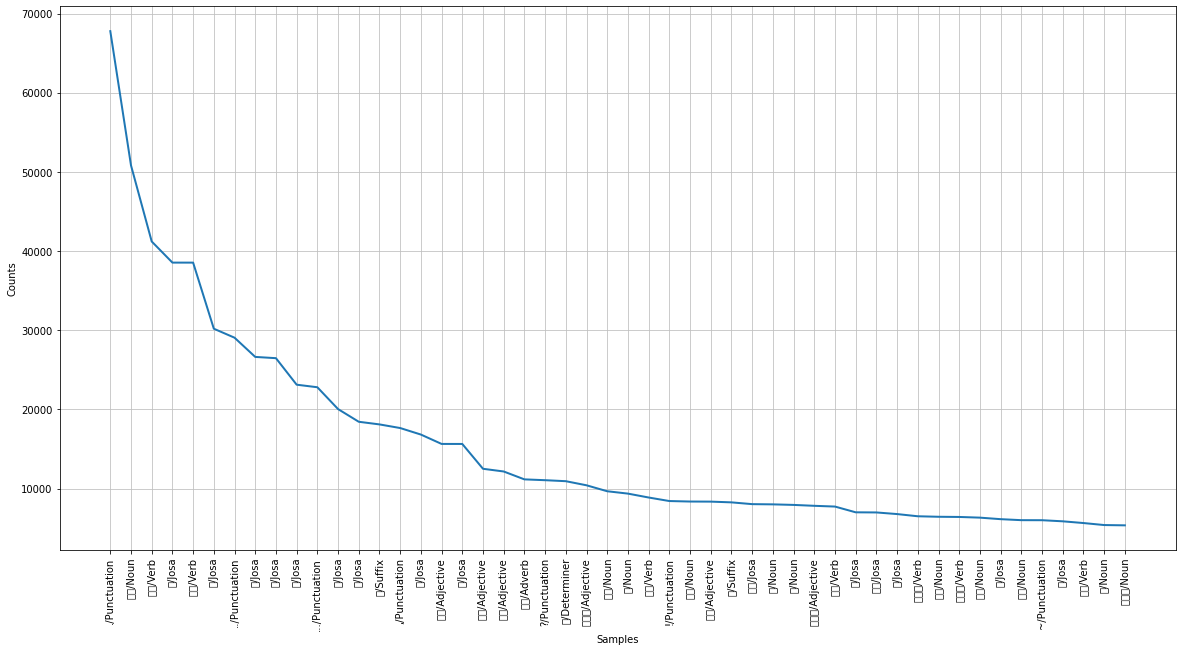

In [16]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline


plt.figure(figsize=(20,10))
text.plot(50)

In [0]:
selected_words = [f[0] for f in text.vocab().most_common(10000)]

def term_frequency(doc):
    return [doc.count(word) for word in selected_words]

train_x = [term_frequency(d) for d, _ in train_docs]
test_x = [term_frequency(d) for d, _ in test_docs]
train_y = [c for _, c in train_docs]
test_y = [c for _, c in test_docs]

In [0]:
import numpy as np

x_train = np.asarray(train_x).astype('float32')
x_test = np.asarray(test_x).astype('float32')

y_train = np.asarray(train_y).astype('float32')
y_test = np.asarray(test_y).astype('float32')

In [19]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

model.fit(x_train, y_train, epochs=10, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/10
293/293 [==============================] - 13s 46ms/step - loss: 0.3899 - binary_accuracy: 0.8339
Epoch 2/10
293/293 [==============================] - 3s 9ms/step - loss: 0.3181 - binary_accuracy: 0.8644
Epoch 3/10
293/293 [==============================] - 3s 9ms/step - loss: 0.2943 - binary_accuracy: 0.8769
Epoch 4/10
293/293 [==============================] - 3s 9ms/step - loss: 0.2761 - binary_accuracy: 0.8870
Epoch 5/10
293/293 [==============================] - 3s 9ms/step - loss: 0.2588 - binary_accuracy: 0.8955
Epoch 6/10
293/293 [==============================] - 3s 9ms/step - loss: 0.2410 - binary_accuracy: 0.9046
Epoch 7/10
293/293 [==============================] - 3s 9ms/step - loss: 0.2230 - binary_accuracy: 0.9136
Epoch 8/10
293/293 [==============================] - 3s 10ms/step - loss: 0.2044 - binary_accuracy: 0.9216
Epoch 9/10
293/293 [==============================] - 3s 10ms/step - loss: 0.1867 - binary_accuracy: 0.9290
Epoch 10/10
1563/1563 [==========

In [20]:
results

[0.40954676270484924, 0.8507199883460999]

In [0]:
def predict_pos_neg(review):
    token = tokenize(review)
    tf = term_frequency(token)
    data = np.expand_dims(np.asarray(tf).astype('float32'), axis=0)
    score = float(model.predict(data))
    if(score > 0.5):
        result = "[{}]는 {:.2f}% 확률로 긍정 리뷰".format(review, score * 100)
    else:
        result = "[{}]는 {:.2f}% 확률로 부정 리뷰".format(review, (1 - score) * 100)
    return result

In [60]:
predict_pos_neg('올해 최고의 영화!')

'[올해 최고의 영화!]는 95.98% 확률로 긍정 리뷰'

In [0]:
mydata = pd.read_excel('/gdrive/My Drive/정제 영화 리뷰 150개.xlsx')

In [62]:
mydata.head()

,영화이름,리뷰,점수
0,곡성,곡 소리 나게 대박나기 바랍니다,10
1,곡성,우리 동네에서도 촬영하던데 잘 되길 바랍니다,10
2,곡성,짱,10
3,곡성,곡소리나게 흥하리라,10
4,곡성,기대해 볼까나 ^^,10


In [0]:
mydata['emotion score'] = mydata['리뷰'].apply(predict_pos_neg)

In [64]:
mydata.head()

,영화이름,리뷰,점수,emotion score
0,곡성,곡 소리 나게 대박나기 바랍니다,10,[곡 소리 나게 대박나기 바랍니다]는 95.48% 확률로 긍정 리뷰
1,곡성,우리 동네에서도 촬영하던데 잘 되길 바랍니다,10,[우리 동네에서도 촬영하던데 잘 되길 바랍니다]는 95.65% 확률로 긍정 리뷰
2,곡성,짱,10,[짱]는 96.32% 확률로 긍정 리뷰
3,곡성,곡소리나게 흥하리라,10,[곡소리나게 흥하리라]는 84.16% 확률로 긍정 리뷰
4,곡성,기대해 볼까나 ^^,10,[기대해 볼까나 ^^]는 58.72% 확률로 부정 리뷰


In [0]:
from google.colab import files

mydata.to_csv('movie_review.csv', encoding='cp949')
files.download('movie_review.csv')